# Reto -> Entrega 2 Clasificación-ensambles
# Alumno: Luis José Navarrete Baduy, Rodrigo López Aguilera
# Matrícula: A01793919, A01793071
# Profesor: Maria de la Paz Rico
# Fecha: 18 de noviembre del 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, validation_curve, learning_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix
from imblearn.pipeline import make_pipeline
from imblearn.metrics import geometric_mean_score
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data_subterraneos_clean.csv', encoding='ISO-8859-1')
# Cambiando los valores de la variable SEMAFORO
semaforo_dict = {'Verde': 0, 'Rojo': 1, 'Amarillo': 2}
df['SEMAFORO'] = df['SEMAFORO'].replace(semaforo_dict)
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,...,CUMPLE_CON_CR_SI,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI,SEMAFORO
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,4.184656,1,0,...,1,0,1,0,1,0,1,0,1,0
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,5.750110,1,0,...,1,0,1,0,1,0,1,0,1,0
2,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,1.449803,1,0,...,1,0,1,0,1,0,1,0,1,1
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,1.258597,1,0,...,1,0,1,0,1,0,1,0,1,0
4,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,15.672251,1,0,...,1,0,1,0,1,0,1,0,1,1


In [3]:
target = ['SEMAFORO']
features = [v for v in df.columns.values.tolist() if v not in target]

In [4]:
# Obtener las variables mas relevantes utilizando RFE
forest = RandomForestClassifier()
selector = RFE(forest, n_features_to_select=20)
selector.fit(df[features], np.ravel(df[target]))

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [5]:
# Variables mas relevantes para la clasificación
relevant_features = selector.get_feature_names_out().tolist()
print(relevant_features)

['CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'N_NO3_mg/L', 'CALIDAD_FLUO_Alta', 'CALIDAD_DUR_Muy dura e indeseable usos industrial y domestico', 'CALIDAD_N_NO3_No apta como FAAP', 'CALIDAD_AS_No apta como FAAP', 'CONTAMINANTES_NINGUNO', 'CUMPLE_CON_FLUO_NO', 'CUMPLE_CON_FLUO_SI', 'CUMPLE_CON_DUR_SI', 'CUMPLE_CON_CF_NO', 'CUMPLE_CON_CF_SI', 'CUMPLE_CON_NO3_NO', 'CUMPLE_CON_NO3_SI', 'CUMPLE_CON_AS_SI', 'CUMPLE_CON_MN_SI', 'CUMPLE_CON_FE_SI']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[relevant_features], df[target], test_size=0.15, random_state=42, stratify=df[target])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(874, 20) (155, 20) (874, 1) (155, 1)


In [21]:
decision_tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)

In [22]:
models = [decision_tree, forest]
names = ['Decision Tree', 'Random Forest']
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
results = list()
print(f'Model\t\t\tAccuracy')
for i in range(len(models)):
    scores = cross_validate(models[i], X_train, y_train, cv=cross_validation, n_jobs=-1)
    results.append(scores)
    print("%-20s\t%.4f\t" % (
        names[i],
        np.mean(scores['test_score'])  
    ))

Model			Accuracy
Decision Tree       	0.9634	
Random Forest       	0.9783	


In [23]:
from sklearn.metrics import classification_report

In [24]:
model_dc = DecisionTreeClassifier()
model_dc.fit(X_train, np.ravel(y_train))
y_pred_dc = model_dc.predict(X_test)
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, np.ravel(y_train))
y_pred_rfc = model_rfc.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.96      0.91      0.93        54
           2       0.88      0.95      0.91        37

    accuracy                           0.95       155
   macro avg       0.95      0.95      0.95       155
weighted avg       0.96      0.95      0.96       155



In [26]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      0.87      0.93        54
           2       0.84      1.00      0.91        37

    accuracy                           0.95       155
   macro avg       0.95      0.96      0.95       155
weighted avg       0.96      0.95      0.96       155



In [27]:
def plot_cm(a):
    # Select Confusion Matrix Size
    plt.figure(figsize = (10,5))

    # Create Confusion Matrix
    b = sns.heatmap(a, annot=True)

    # Set the Title
    b.set(title='Confusion Matrix')

    # Set the Labels
    b.set(xlabel='Predicted', ylabel='Actual')

    # Display the Confusion Matrix
    plt.show()

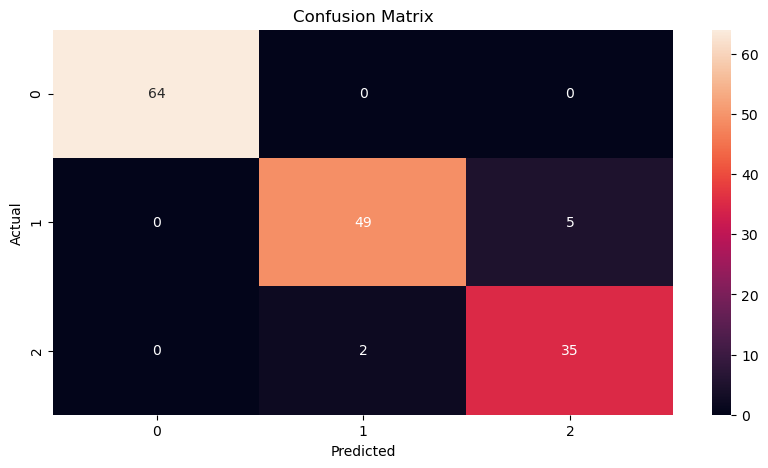

In [28]:
plot_cm(confusion_matrix(y_test, y_pred_dc))

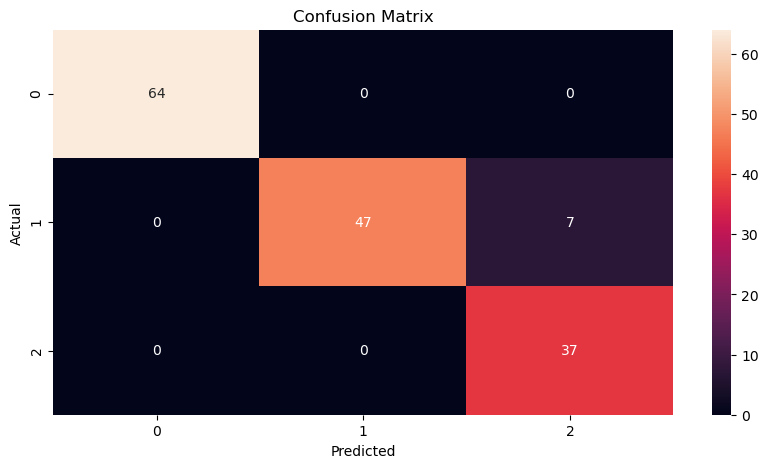

In [29]:
plot_cm(confusion_matrix(y_test, y_pred_rfc))

In [30]:
model_dc.feature_importances_

array([0.00180854, 0.00773654, 0.13467678, 0.01933472, 0.08761994,
       0.        , 0.        , 0.        , 0.        , 0.56579154,
       0.        , 0.        , 0.        , 0.10322485, 0.        ,
       0.        , 0.        , 0.07883025, 0.        , 0.00097684])

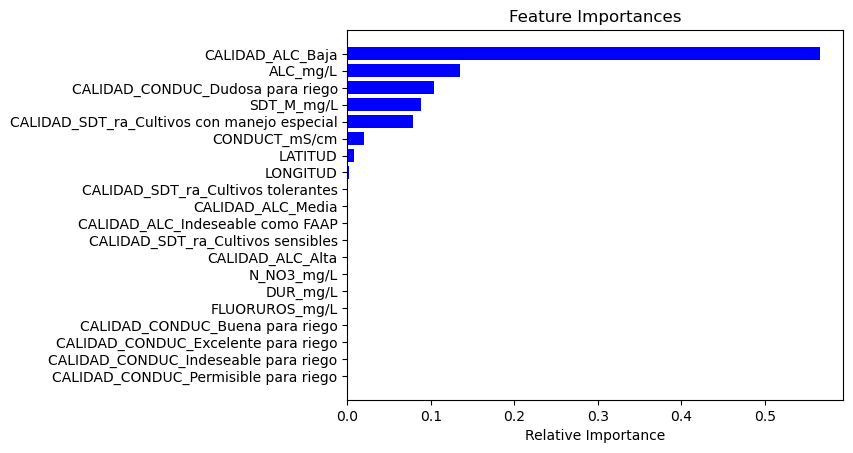

In [31]:
importances = model_dc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('../assets/dt_importances')
plt.show()

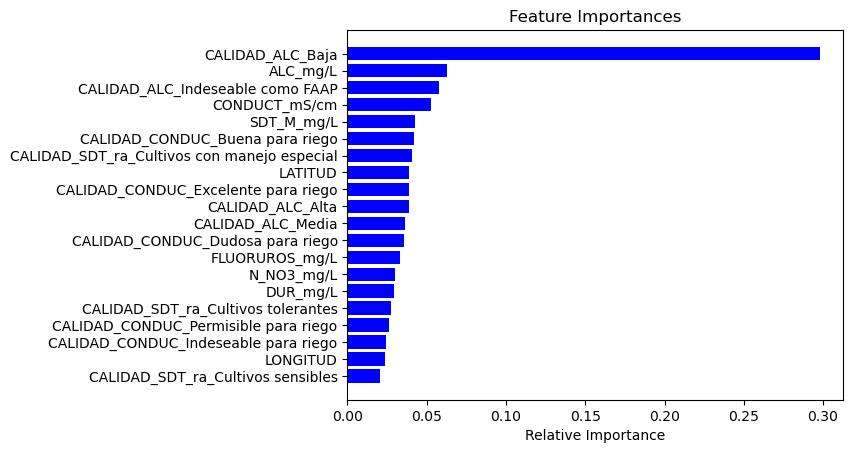

In [32]:
importances = model_rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('../assets/rfc_importances')
plt.show()